**Import** **Dependecies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**upload data set**

In [2]:
#uploading train data
train_data = pd.read_csv('/content/train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#show the shape of the data rows and columns
train_data.shape

(891, 12)

# **check if there is any missing values**

In [5]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**data types check**

In [6]:
train_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


**get some information about data**

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***describtion for the numerical data  ***

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# count values of the categorical fetures

In [9]:
print(train_data['Embarked'].value_counts())
print(train_data['Pclass'].value_counts())
print(train_data['Sex'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64


In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Replacing the missing values of Age column with the median of the column and the embarked column with the mode

In [11]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-11-3702374246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(),inplace=True)
/tmp/ipython-input-11-3702374246.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [12]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Dropping Irrelevant or Redundant Columns

In [13]:
train_data.drop(columns=['Cabin','Ticket','Name'] , inplace=True)

# Check if there is any duplicated values

In [14]:
print('number of duplicated values is : ' , train_data.duplicated().sum())

number of duplicated values is :  0


In [15]:
train_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


# Ensuring Data Consistency and Correctness

In [16]:
train_data['Embarked'] = train_data['Embarked'].astype('category')

train_data['Sex'] = train_data['Sex'].astype('category')

train_data['Survived'] = train_data['Survived'].astype('category')

train_data['Pclass'] = train_data['Pclass'].astype('category')

In [17]:
train_data.dtypes

,0
PassengerId,int64
Survived,category
Pclass,category
Sex,category
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,category


# Histogram for age

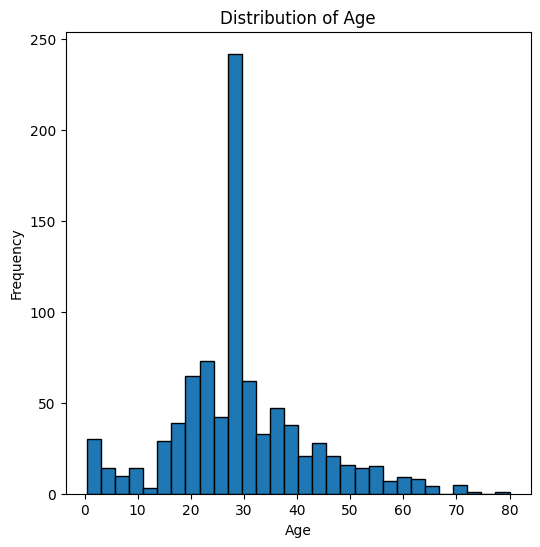

In [18]:
train_data['Age'].plot(kind='hist', edgecolor = 'black', bins = 30 , figsize = (6,6))

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for fare

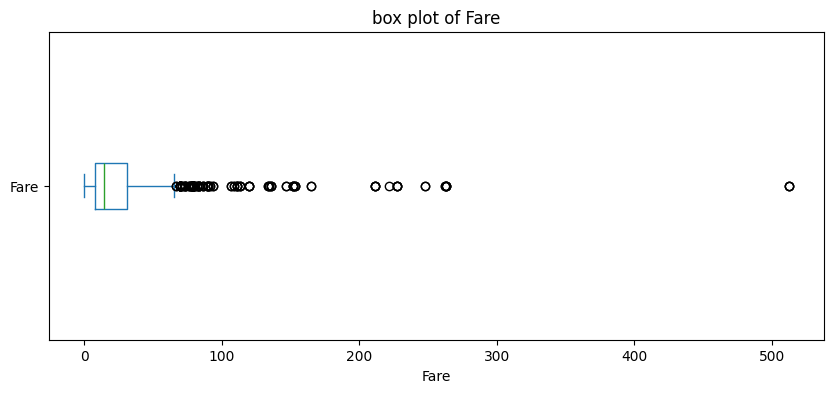

In [19]:
train_data['Fare'].plot(kind = 'box', vert = False , figsize = (10,4))

plt.title('box plot of Fare')
plt.xlabel('Fare')
plt.show()

# Correlation matrix

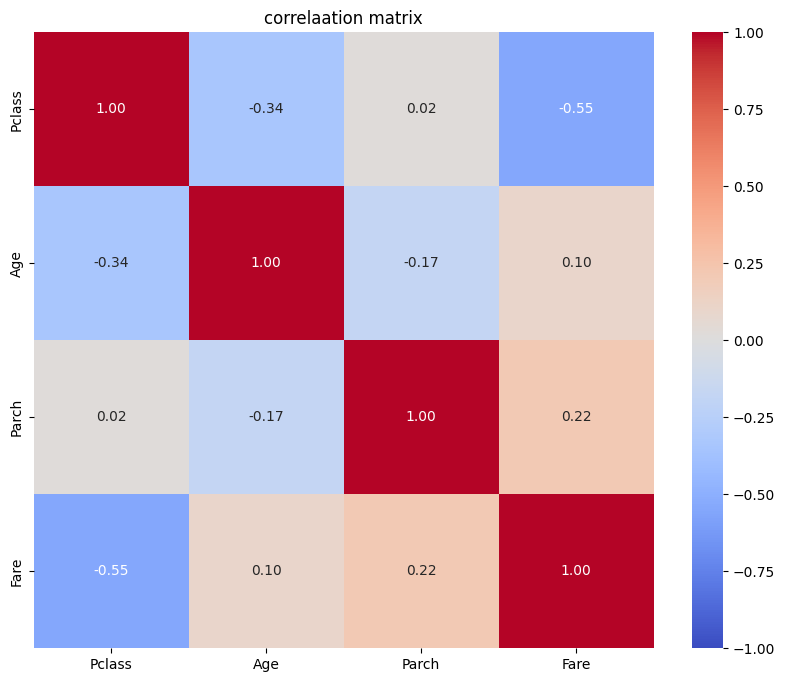

In [20]:
corr = train_data[['Pclass','Age','Parch','Fare']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True , cmap ='coolwarm', vmin = -1 , vmax= 1 , fmt ='.2f')

plt.title('correlaation matrix')
plt.show()

# Drop unneeded column

In [21]:
train_data.drop(columns=['PassengerId'],inplace = True)

# Encode using one hot encoder

In [22]:
train_data = pd.get_dummies(train_data , columns = ['Sex'] , drop_first =True)

In [39]:
train_data = pd.get_dummies(train_data , columns = ['Pclass'], drop_first=True)

In [27]:
train_data = pd.get_dummies(train_data , columns = ['Embarked'] , drop_first = True)

In [23]:
# change the data type to integer to change from True and False to 0 and 1
train_data['Sex_male'] = train_data['Sex_male'].astype(int)

In [34]:
train_data['Embarked_Q'] = train_data['Embarked_Q'].astype(int)
train_data['Embarked_S'] = train_data['Embarked_S'].astype(int)

In [41]:
train_data['Pclass_2'] = train_data['Pclass_2'].astype(int)
train_data['Pclass_3'] = train_data['Pclass_3'].astype(int)

In [24]:
train_data['Sex_male'].value_counts()

,count
Sex_male,
1,577
0,314


# Scale the Age with the max value

In [25]:
train_data['Age'] = train_data['Age'] / train_data['Age'].max()

In [42]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0.2750,1,0,0.014151,1,0,1,0,1
1,1,0.4750,1,0,0.139136,0,0,0,0,0
2,1,0.3250,0,0,0.015469,0,0,1,0,1
3,1,0.4375,1,0,0.103644,0,0,1,0,0
4,0,0.4375,0,0,0.015713,1,0,1,0,1


# Scale Fare column using MinMax Scaler

In [28]:
train_data['Fare'] = (train_data['Fare'] - train_data['Fare'].min()) / (train_data['Fare'].max() - train_data['Fare'].min())

In [35]:
train_data.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,0.275,1,0,0.014151,1,0,1


In [37]:
train_data['Survived'] = train_data['Survived'].astype(int)

In [43]:
train_data.dtypes

,0
Survived,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Sex_male,int64
Embarked_Q,int64
Embarked_S,int64
Pclass_2,int64
Pclass_3,int64


# split data into train and test

In [46]:
from sklearn.model_selection import train_test_split

x = train_data.drop(columns='Survived', axis = 1)
y = train_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state=42, test_size=0.1)


Import model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score

model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('accuracy_score = ' , accuracy_score(y_test,y_pred) * 100 ,'%')
print(classification_report(y_test,y_pred))

accuracy_score =  77.77777777777779 %
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        55
           1       0.69      0.77      0.73        35

    accuracy                           0.78        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.78      0.78      0.78        90



In [58]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder = False , eval_metric = 'logloss')
model.fit(x_train,y_train)

xg_pred = model.predict(x_test)

print('accuracy_score = ' , accuracy_score(y_test,xg_pred) * 100 ,'%')
print(classification_report(y_test,xg_pred))

accuracy_score =  82.22222222222221 %
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        55
           1       0.76      0.80      0.78        35

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.82      0.82        90



## Create a predictive system

In [54]:
import numpy as np

# Manual scaling constants (based on training data)
age_max = train_data['Age'].max()
fare_min = train_data['Fare'].min()
fare_max = train_data['Fare'].max()

pclass = 2
age = 28
sibsp = 0
parch = 0
fare = 13
sex = 'female'
embarked = 'S'

pclass_2 = 1 if pclass == 2 else 0
pclass_3 = 1 if pclass == 3 else 0

sex_male = 1 if sex == 'male' else 0

embarked_q = 1 if embarked.upper() == 'Q' else 0
embarked_s = 1 if embarked.upper() == 'S' else 0

age_scaled = age / age_max
fare_scaled = (fare - fare_min) / (fare_max - fare_min)


input_data = (pclass_2, pclass_3, age_scaled, sibsp, parch, fare_scaled, sex_male, embarked_q, embarked_s)

# Reshape and predict
input_array = np.asarray(input_data).reshape(1, -1)
prediction = model.predict(input_array)

if prediction[0] == 0:
    print("🚫 The passenger did NOT survive.")
else:
    print("✅ The passenger SURVIVED!")


🚫 The passenger did NOT survive.


# prepare test data for submisssion

In [59]:
test_data = pd.read_csv('/content/test.csv')

In [60]:
passenger_ids = test_data['PassengerId']

test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna('S', inplace=True)


test_data = pd.get_dummies(test_data, columns=['Sex'], drop_first=True)

# One-hot encode Embarked
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# One-hot encode Pclass
test_data = pd.get_dummies(test_data, columns=['Pclass'], drop_first=True)

# Drop unused columns
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Reorder/test final columns match training data
test_data = test_data.reindex(columns=x.columns, fill_value=0)

# Manual scaling
test_data['Age'] = test_data['Age'] / train_data['Age'].max()
test_data['Fare'] = (test_data['Fare'] - train_data['Fare'].min()) / (train_data['Fare'].max() - train_data['Fare'].min())


In [61]:
# Predict
predictions = model.predict(test_data)

# Submission DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)


In [63]:
import pickle

# Save the trained model
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [64]:
age_max = train_data['Age'].max()
fare_min = train_data['Fare'].min()
fare_max = train_data['Fare'].max()

# Save scaling constants
with open('scaling_values.pkl', 'wb') as file:
    pickle.dump((age_max, fare_min, fare_max), file)
